# 生成数组的函数
## arange
arange 类似于Python中的 range 函数，只不过返回的不是列表，而是数组：

arange(start, stop=None, step=1, dtype=None)

产生一个在区间 [start, stop) 之间，以 step 为间隔的数组，如果只输入一个参数，则默认从 0 开始，并以这个值为结束：

In [2]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

与range不同，aroung允许非整数值输入，产生一个非整形的数组。

In [3]:
np.arange(0, 2*np.pi, np.pi/4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

数组的默认类型由参数start ，start， step来确定，也可以指定。

In [5]:
np.arange(0,2*np.pi, np.pi/4,dtype=np.float32)

array([0.       , 0.7853982, 1.5707964, 2.3561945, 3.1415927, 3.926991 ,
       4.712389 , 5.4977875], dtype=float32)

由于存在精度问题，使用浮点数，也可能存在问题。

In [6]:
np.arange(1.5,2.1,0.3)

array([1.5, 1.8, 2.1])

stop的值2.1出现在了数组中，所以使用浮点数的时候需要注意。

## linspace
linspace(start,stop,N)
产生N个等距离分布在[start，stop]上的元素，包括start和stop

In [7]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## meshgrid
有时候需要在二维平面中生成一个网格，这时候可以使用 meshgrid 来完成这样的工作：

In [8]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

这里产生的 x, y如下：

In [9]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [10]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

x 对应网格的第一维，y 对应网格的第二维。

图例：

/home/swyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 0, 'z')

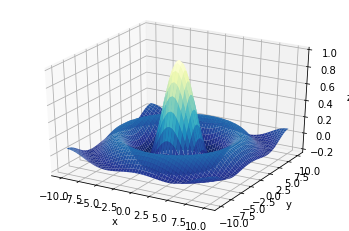

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事实上，x, y 中有很多冗余的元素，这里提供了一个 sparse 的选项：

In [12]:
x_ticks = np.linspace(-1,1,5)

In [15]:
y_ticks = np.linspace(-1,1,5)
x,y = np.meshgrid(x_ticks,y_ticks,sparse = True)

In [16]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [17]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在这个选项下，x, y 变成了单一的行向量和列向量。

但这并不影响结果：

/home/swyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 0, 'z')

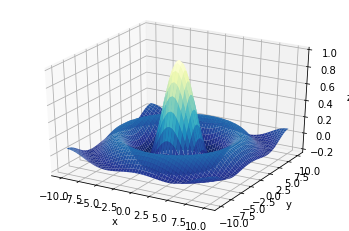

In [28]:
x_ticks = np.linspace(-10,10,51)
y_ticks = np.linspace(-10,10,51)
x,y = np.meshgrid(x_ticks,y_ticks,sparse = True)

z = f(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,
               rstride=1,cstride=1,
               cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

meshgtid可以设置轴排列的先后顺序
- 默认为indexing='xy'即笛卡尔坐标，对于2维数组，返回行向量x和列向量y
- 或者使用新的行='ig'即矩阵坐标，对于2维数组，返行向量x和列向量y

## ogrid，mgrid
Matlab中有meshgrid用法

meshgrid(-1:.5,-1:.5:1)
Numpy的meshgrid并不支持这样的用法，但我们可以使用ogrid/mgri来实现类似的用法。
- ogrid 相当于 meshgrid(indexing='ij', sparse=True)
- mgrid 相当于 meshgrid(indexing='ij', sparse=False)

In [31]:
x, y = np.ogrid[-1:1:.5,-1:1.5]

In [32]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [33]:
y

array([[-1.,  0.,  1.]])

注意：
- 这里使用的是中括号
- Matlab使用的start:step:end，Numpy使用的是start:end:step的表示
- 这里的结果不包括end的值
为了包含end的值，我们可以使用这样的技巧：


In [37]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]

In [38]:
x,y

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]),
 array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

我们在stap的位置传入一个复数5j，表示我们需要一个5个值的数组，此时返回值就会包含end的值

/home/swyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 0, 'z')

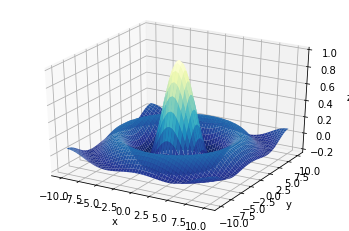

In [39]:
# exchange here
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

这里，我们交换了 x, y 输出值的顺序。

r_ , c_
我们可以使用 r_ / c_ 来产生行向量或者列向量。

使用切片产生：

In [40]:
np.r_[0:1:.1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

复数步长制定数组长度：

In [41]:
np.r_[0:1:5j]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

连接多个序列，产生数组：

In [42]:
np.r_[(3,22,11), 4.0, [15, 6]]

array([ 3., 22., 11.,  4., 15.,  6.])

列向量：

In [43]:
np.c_[1:3:5j]

array([[1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

## ones , zeros

ones(shape, dtype=float64)

zeros(shape, dtype=float64)

产生一个制定形状的全 0 或全 1 的数组，还可以制定数组类型：

In [45]:
np.zeros(3)

array([0., 0., 0.])

In [46]:
np.ones([2,3], dtype=np.float32)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

产生一个全是 5 的数组：

In [47]:
np.ones([2,3]) * 5

array([[5., 5., 5.],
       [5., 5., 5.]])

## empty
empty(shape, dtype=float64, order='C')

也可以使用 empty 方法产生一个制定大小的数组（数组所指向的内存未被初始化，所以值随机），再用 fill 方法填充：

In [49]:
a = np.empty(2)
a

array([7.4e-323, 3.0e-323])

In [50]:
a.fill(5)
a

array([5., 5.])

另一种替代方法使用索引，不过速度会稍微慢一些：

In [51]:
a[:] = 5
a

array([5., 5.])

## empty_like, ones_like, zeros_like
empty_like(a)
ones_like(a)
zeros_like(a)

产生一个跟 a 大小一样，类型一样的对应数组。

In [52]:
a = np.arange(0, 10, 2.5)
a


array([0. , 2.5, 5. , 7.5])

In [53]:
np.empty_like(a)

array([0. , 2.5, 5. , 7.5])

In [54]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [55]:
np.ones_like(a)

array([1., 1., 1., 1.])

## identity
indentity(n, dtype=float64)
产生一个 n 乘 n 的单位矩阵：

In [57]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])